In [1]:
import numpy as np
import pandas as pd
from sklearn.utils import shuffle
from sklearn.ensemble import RandomForestRegressor
import matplotlib.pyplot as plt
from sklearn.pipeline import Pipeline
from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import confusion_matrix

In [2]:
cohort_input_address='/home/rictuar/coding_projects/fiehn_work/cfmid/cfmid_redo/results/compound_exploration/[M+H]+_hcd_cohort_fingerprints.bin'

In [3]:
dataset=pd.read_pickle(cohort_input_address)

In [4]:
dataset=shuffle(dataset,random_state=1337)
dataset.reset_index(inplace=True)

In [5]:
X=np.array(dataset.fingerprint_array.to_list())

In [6]:
y=np.array(dataset.dot_product.to_list())
y=1-y

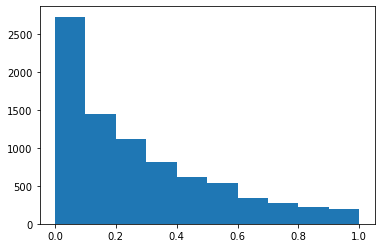

In [7]:
plt.hist(y)
plt.show()

In [8]:
y[y>=0.7]=1
y[y<0.7]=0

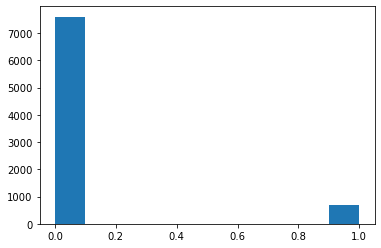

In [9]:
plt.hist(y)
plt.show()

In [10]:
X_train=X[0:int(np.floor(0.8*len(X)))]
y_train=y[0:int(np.floor(0.8*len(y)))]
X_test=X[int(np.floor(0.8*len(X))):]
y_test=y[int(np.floor(0.8*len(y))):]

In [11]:
my_RandomForestClassifier_Pipeline=Pipeline(
    [
        #('my_StandardScaler',StandardScaler()),
        ('my_RandomForestClassifier',RandomForestClassifier())
    ]
)
my_RandomForestClassifier_parameters=[
    {
        'my_RandomForestClassifier__n_estimators':[10,20,40,100,200],
        'my_RandomForestClassifier__n_jobs':[4],
        'my_RandomForestClassifier__random_state':[1337]#,
        #'my_RandomForestRegressor__max_depth':[5]
        
    }
]

In [12]:
my_RandomForestClassifier_Gridsearch=GridSearchCV(
    my_RandomForestClassifier_Pipeline,
    my_RandomForestClassifier_parameters,
    cv=5,
    scoring='precision',
    return_train_score=True
)

my_RandomForestClassifier_Gridsearch.fit(X_train,y_train)

my_RandomForestClassifier_Gridsearch_results=my_RandomForestClassifier_Gridsearch.cv_results_
for mean_score, params in zip(my_RandomForestClassifier_Gridsearch_results["mean_test_score"],my_RandomForestClassifier_Gridsearch_results["params"]):
    #print(np.sqrt(-mean_score), params)
    print(mean_score,params)
    
winner_RandomForestClassifier=my_RandomForestClassifier_Gridsearch.best_estimator_

0.4916946383242268 {'my_RandomForestClassifier__n_estimators': 10, 'my_RandomForestClassifier__n_jobs': 4, 'my_RandomForestClassifier__random_state': 1337}
0.5370872783130849 {'my_RandomForestClassifier__n_estimators': 20, 'my_RandomForestClassifier__n_jobs': 4, 'my_RandomForestClassifier__random_state': 1337}
0.5362289915966386 {'my_RandomForestClassifier__n_estimators': 40, 'my_RandomForestClassifier__n_jobs': 4, 'my_RandomForestClassifier__random_state': 1337}
0.5391266975377198 {'my_RandomForestClassifier__n_estimators': 100, 'my_RandomForestClassifier__n_jobs': 4, 'my_RandomForestClassifier__random_state': 1337}
0.5294150294150294 {'my_RandomForestClassifier__n_estimators': 200, 'my_RandomForestClassifier__n_jobs': 4, 'my_RandomForestClassifier__random_state': 1337}


In [13]:
print(my_RandomForestClassifier_Gridsearch_results)

{'mean_fit_time': array([0.29988027, 0.1951674 , 0.24901295, 0.42751942, 0.7163928 ]), 'std_fit_time': array([0.24286926, 0.00384678, 0.00733909, 0.01318346, 0.0156973 ]), 'mean_score_time': array([0.02334847, 0.02665462, 0.04605474, 0.08539772, 0.14800277]), 'std_score_time': array([0.00344871, 0.00794904, 0.00131667, 0.00443423, 0.0072295 ]), 'param_my_RandomForestClassifier__n_estimators': masked_array(data=[10, 20, 40, 100, 200],
             mask=[False, False, False, False, False],
       fill_value='?',
            dtype=object), 'param_my_RandomForestClassifier__n_jobs': masked_array(data=[4, 4, 4, 4, 4],
             mask=[False, False, False, False, False],
       fill_value='?',
            dtype=object), 'param_my_RandomForestClassifier__random_state': masked_array(data=[1337, 1337, 1337, 1337, 1337],
             mask=[False, False, False, False, False],
       fill_value='?',
            dtype=object), 'params': [{'my_RandomForestClassifier__n_estimators': 10, 'my_RandomF

In [14]:
y_predict=winner_RandomForestClassifier.predict(X_test)

In [15]:
my_confusion=confusion_matrix(y_test,y_predict)


In [16]:
my_confusion

array([[1488,   14],
       [ 123,   35]])

<AxesSubplot:>

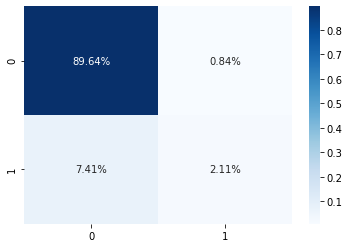

In [17]:
import seaborn as sns
sns.heatmap(my_confusion/np.sum(my_confusion), annot=True, 
            fmt='.2%', cmap='Blues')

In [18]:
from imblearn.ensemble import BalancedRandomForestClassifier

In [19]:
my_BalancedRandomForestClassifier_Pipeline=Pipeline(
    [
        #('my_StandardScaler',StandardScaler()),
        ('my_BalancedRandomForestClassifier',BalancedRandomForestClassifier())
    ]
)
my_BalancedRandomForestClassifier_parameters=[
    {
        'my_BalancedRandomForestClassifier__n_estimators':[10,20,40,100,200],
        'my_BalancedRandomForestClassifier__n_jobs':[5],
        'my_BalancedRandomForestClassifier__random_state':[1337],
        'my_BalancedRandomForestClassifier__criterion':['gini','entropy'],
        'my_BalancedRandomForestClassifier__sampling_strategy':[
            'not majority','not minority','all'
        ],
        'my_BalancedRandomForestClassifier__replacement':[True,False]
        #,
        #'my_BalancedRandomForestRegressor__max_depth':[5]
        
    }
]

In [20]:
my_BalancedRandomForestClassifier_Gridsearch=GridSearchCV(
    my_BalancedRandomForestClassifier_Pipeline,
    my_BalancedRandomForestClassifier_parameters,
    cv=5,
    scoring='precision',
    return_train_score=True
)

my_BalancedRandomForestClassifier_Gridsearch.fit(X_train,y_train)

my_BalancedRandomForestClassifier_Gridsearch_results=my_BalancedRandomForestClassifier_Gridsearch.cv_results_
for mean_score, params in zip(my_BalancedRandomForestClassifier_Gridsearch_results["mean_test_score"],my_BalancedRandomForestClassifier_Gridsearch_results["params"]):
    #print(np.sqrt(-mean_score), params)
    print(mean_score,params)
    
winner_BalancedRandomForestClassifier=my_BalancedRandomForestClassifier_Gridsearch.best_estimator_

0.5483333333333332 {'my_BalancedRandomForestClassifier__criterion': 'gini', 'my_BalancedRandomForestClassifier__n_estimators': 10, 'my_BalancedRandomForestClassifier__n_jobs': 5, 'my_BalancedRandomForestClassifier__random_state': 1337, 'my_BalancedRandomForestClassifier__replacement': True, 'my_BalancedRandomForestClassifier__sampling_strategy': 'not majority'}
0.17778685765652216 {'my_BalancedRandomForestClassifier__criterion': 'gini', 'my_BalancedRandomForestClassifier__n_estimators': 10, 'my_BalancedRandomForestClassifier__n_jobs': 5, 'my_BalancedRandomForestClassifier__random_state': 1337, 'my_BalancedRandomForestClassifier__replacement': True, 'my_BalancedRandomForestClassifier__sampling_strategy': 'not minority'}
0.1978318715836876 {'my_BalancedRandomForestClassifier__criterion': 'gini', 'my_BalancedRandomForestClassifier__n_estimators': 10, 'my_BalancedRandomForestClassifier__n_jobs': 5, 'my_BalancedRandomForestClassifier__random_state': 1337, 'my_BalancedRandomForestClassifier_

<AxesSubplot:>

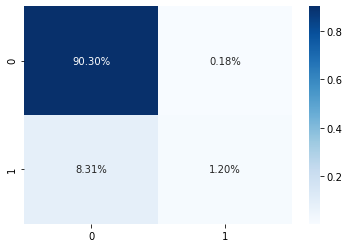

In [21]:
y_Balancedpredict=winner_BalancedRandomForestClassifier.predict(X_test)
my_Balancedconfusion=confusion_matrix(y_test,y_Balancedpredict)
import seaborn as sns
sns.heatmap(my_Balancedconfusion/np.sum(my_Balancedconfusion), annot=True, 
            fmt='.2%', cmap='Blues')

In [22]:
my_BalancedRandomForestClassifier_Gridsearch.best_params_

{'my_BalancedRandomForestClassifier__criterion': 'gini',
 'my_BalancedRandomForestClassifier__n_estimators': 200,
 'my_BalancedRandomForestClassifier__n_jobs': 5,
 'my_BalancedRandomForestClassifier__random_state': 1337,
 'my_BalancedRandomForestClassifier__replacement': True,
 'my_BalancedRandomForestClassifier__sampling_strategy': 'not majority'}

In [23]:
my_BalancedRandomForestClassifier_Gridsearch.best_score_

0.7123792270531402

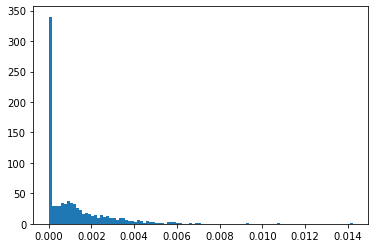

In [24]:
forest=winner_BalancedRandomForestClassifier['my_BalancedRandomForestClassifier']
importances = forest.feature_importances_
#feature_names = [f"feature {i}" for i in range(X.shape[1])]
feature_names = [i for i in range(X.shape[1])]
forest_importances = pd.Series(importances, index=feature_names)
forest_importances.sort_values(ascending=False,inplace=True)
plt.hist(forest_importances,bins=100)
plt.show()

In [25]:
forest_importances=forest_importances.iloc[0:50]
feature_names=forest_importances.index.to_list()
std = np.std([tree.feature_importances_ for tree in forest.estimators_], axis=0)
std=std[forest_importances.index]

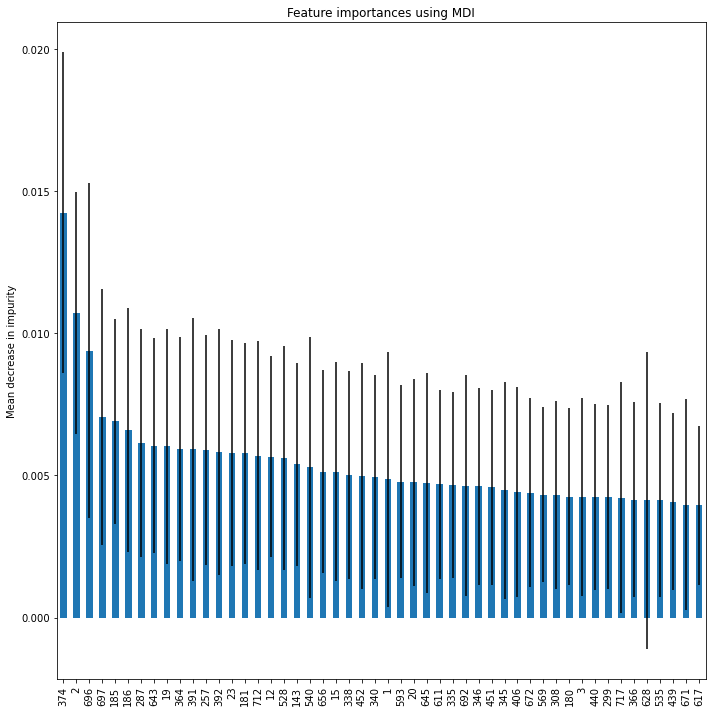

In [26]:
fig, ax = plt.subplots(figsize=(10,10))
forest_importances.plot.bar(yerr=std, ax=ax)
ax.set_title("Feature importances using MDI")
ax.set_ylabel("Mean decrease in impurity")
fig.tight_layout()

In [27]:
forest_importances.index

Int64Index([374,   2, 696, 697, 185, 186, 287, 643,  19, 364, 391, 257, 392,
             23, 181, 712,  12, 528, 143, 540, 656,  15, 338, 452, 340,   1,
            593,  20, 645, 611, 335, 692, 346, 451, 345, 406, 672, 569, 308,
            180,   3, 440, 299, 717, 366, 628, 535, 439, 671, 617],
           dtype='int64')

<AxesSubplot:>

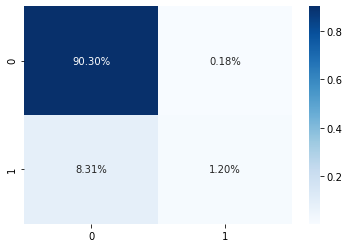

In [28]:
y_Balancedpredict=winner_BalancedRandomForestClassifier.predict(X_test)
my_Balancedconfusion=confusion_matrix(y_test,y_Balancedpredict)
import seaborn as sns
sns.heatmap(my_Balancedconfusion/np.sum(my_Balancedconfusion), annot=True, 
            fmt='.2%', cmap='Blues')

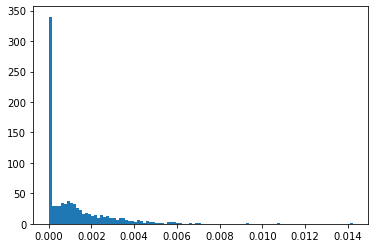

In [29]:
forest=winner_BalancedRandomForestClassifier['my_BalancedRandomForestClassifier']
importances = forest.feature_importances_
#feature_names = [f"feature {i}" for i in range(X.shape[1])]
feature_names = [i for i in range(X.shape[1])]
forest_importances = pd.Series(importances, index=feature_names)
forest_importances.sort_values(ascending=False,inplace=True)
plt.hist(forest_importances,bins=100)
plt.show()

In [30]:
forest_importances=forest_importances.iloc[0:50]
feature_names=forest_importances.index.to_list()
std = np.std([tree.feature_importances_ for tree in forest.estimators_], axis=0)
std=std[forest_importances.index]

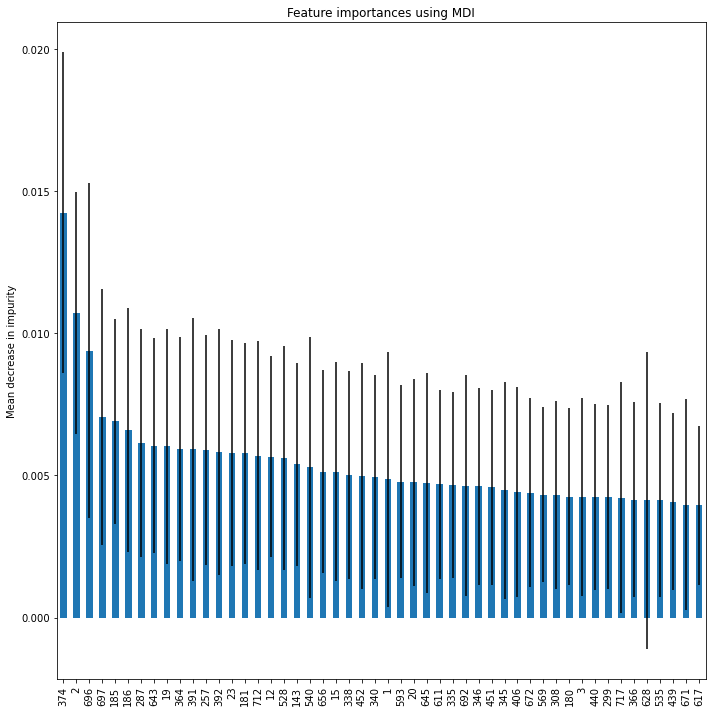

In [31]:
fig, ax = plt.subplots(figsize=(10,10))
forest_importances.plot.bar(yerr=std, ax=ax)
ax.set_title("Feature importances using MDI")
ax.set_ylabel("Mean decrease in impurity")
fig.tight_layout()

In [32]:
forest_importances.index

Int64Index([374,   2, 696, 697, 185, 186, 287, 643,  19, 364, 391, 257, 392,
             23, 181, 712,  12, 528, 143, 540, 656,  15, 338, 452, 340,   1,
            593,  20, 645, 611, 335, 692, 346, 451, 345, 406, 672, 569, 308,
            180,   3, 440, 299, 717, 366, 628, 535, 439, 671, 617],
           dtype='int64')

In [33]:
### BEGIN MONA TEST ###

In [34]:
mona_input_address='/home/rictuar/coding_projects/fiehn_work/cfmid/cfmid_redo/results/compound_exploration/mona/[M+H]+_mona_cohort_fingerprints.bin'

In [35]:
mona_dataset=pd.read_pickle(mona_input_address)

In [36]:
mona_X=np.array(mona_dataset.fingerprint_array.to_list())
mona_y=np.array(mona_dataset.dot_product.to_list())
mona_y=1-mona_y

In [37]:
#include this cell if you want to subset such that
#you only include those lines where the 
#collision energy is 35 or 45 
#and the predicted is close to 40
mona_dataset=mona_dataset.loc[
    (
        (mona_dataset['collision_energy_exp']==35) |
        (mona_dataset['collision_energy_exp']==45)
    ) &
    (
        (mona_dataset['predicted_optimal_nce'] > 30) &
        (mona_dataset['predicted_optimal_nce'] < 50) 
    )
]

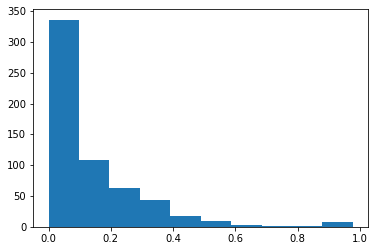

In [38]:
plt.hist(mona_y)
plt.show()

In [39]:
mona_y[mona_y>=0.7]=1
mona_y[mona_y<0.7]=0


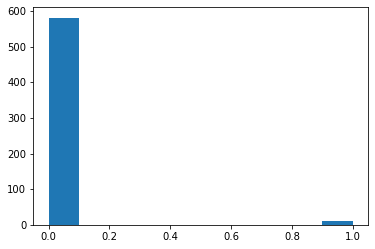

In [40]:
plt.hist(mona_y)
plt.show()

In [41]:
pd.value_counts(mona_y)

0.0    581
1.0     11
dtype: int64

<AxesSubplot:>

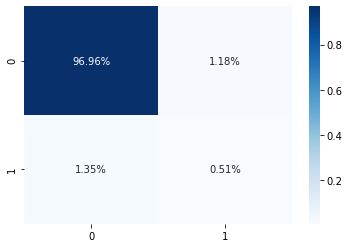

In [42]:
mona_y_Balancedpredict=winner_BalancedRandomForestClassifier.predict(mona_X)
mona_my_Balancedconfusion=confusion_matrix(mona_y,mona_y_Balancedpredict)
sns.heatmap(mona_my_Balancedconfusion/np.sum(mona_my_Balancedconfusion), annot=True, 
            fmt='.2%', cmap='Blues')

In [43]:
mona_dataset=pd.read_pickle(mona_input_address)

In [44]:
#include this cell if you want to subset such that
#you only include those lines where the 
#collision energy is 35 or 45 
#and the predicted is close to 40
mona_dataset=mona_dataset.loc[
    (
        (mona_dataset['collision_energy_exp'].astype(int)==35) |
        (mona_dataset['collision_energy_exp'].astype(int)==45)
    ) &
    (
        (mona_dataset['predicted_optimal_nce'].astype(int) > 25) &
        (mona_dataset['predicted_optimal_nce'].astype(int) < 55) 
    )
]

In [45]:
mona_dataset

,InChIKey,inchikey,dot_product,collision_energy_exp,predicted_optimal_nce,fingerprint_array,cactvs_fingerprint
0,VJVGTGQETNCOEX-UHFFFAOYSA-N,VJVGTGQETNCOEX-LQDZTQBFSA-N,0.887818,45,50.582926,"[1, 1, 1, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 0, 0, ...",1110000001111000001111000000000000000000000000...
2,MSIMWLAIWYFFLY-UHFFFAOYSA-N,MSIMWLAIWYFFLY-UHFFFAOYSA-N,1.000000,45,41.317807,"[1, 1, 1, 1, 0, 0, 0, 0, 0, 1, 1, 1, 1, 0, 1, ...",1111000001111011101110000000000000000000000000...
4,YKRGDOXKVOZESV-UHFFFAOYSA-N,YKRGDOXKVOZESV-RMNZJSDUSA-N,0.794665,45,43.643579,"[1, 1, 1, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 0, 0, ...",1110000001111000001111000000000000000000000000...
11,LCTHKUJMKQOYDY-UHFFFAOYSA-N,LCTHKUJMKQOYDY-ZYIGBFDLSA-N,0.928132,35,39.676572,"[1, 1, 1, 1, 0, 0, 0, 0, 0, 1, 1, 1, 1, 0, 0, ...",1111000001111000001111000000000000000000000000...
12,GLACGTLACKLUJX-UHFFFAOYSA-N,GLACGTLACKLUJX-QNAXTHAFSA-N,0.785210,45,44.952981,"[1, 1, 1, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 0, 0, ...",1110000001111000001111000000000000000000000000...
...,...,...,...,...,...,...,...
588,ZEJXENDZTYVXDP-UHFFFAOYSA-N,ZEJXENDZTYVXDP-CSJHBIPPSA-N,0.986415,35,35.284291,"[1, 1, 1, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 0, 0, ...",1110000001111000001111000000000000000000000000...
589,YAEGHQJYDLCTMR-UHFFFAOYSA-N,YAEGHQJYDLCTMR-DCIPZJNNSA-N,0.862621,45,48.249493,"[1, 1, 1, 1, 0, 0, 0, 0, 0, 1, 1, 1, 1, 0, 0, ...",1111000001111000001110000000000000000000000000...
595,PMISPNORJONCHB-UHFFFAOYSA-N,PMISPNORJONCHB-DKBZVKCESA-N,0.804266,45,47.812954,"[1, 1, 1, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 0, 0, ...",1110000001111000001110000000000000000000000000...
599,JJSVXWKQLGHFES-UHFFFAOYSA-N,JJSVXWKQLGHFES-QGZYWIHFSA-N,1.000000,35,31.563912,"[1, 1, 1, 1, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 0, ...",1111000001111100001111000000000000000000000000...


In [46]:
mona_X=np.array(mona_dataset.fingerprint_array.to_list())
mona_y=np.array(mona_dataset.dot_product.to_list())
mona_y=1-mona_y

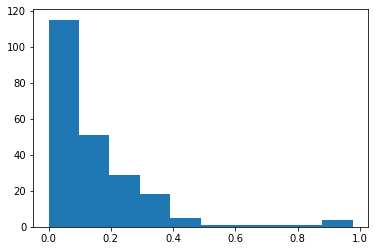

In [47]:
plt.hist(mona_y)
plt.show()

In [48]:
mona_y[mona_y>=0.7]=1
mona_y[mona_y<0.7]=0

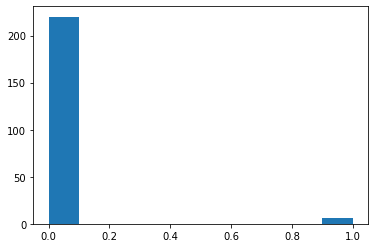

In [49]:
plt.hist(mona_y)
plt.show()

<AxesSubplot:>

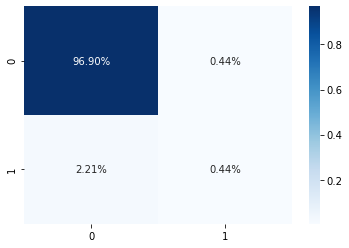

In [50]:
mona_y_Balancedpredict=winner_BalancedRandomForestClassifier.predict(mona_X)
mona_my_Balancedconfusion=confusion_matrix(mona_y,mona_y_Balancedpredict)
sns.heatmap(mona_my_Balancedconfusion/np.sum(mona_my_Balancedconfusion), annot=True, 
            fmt='.2%', cmap='Blues')

<AxesSubplot:>

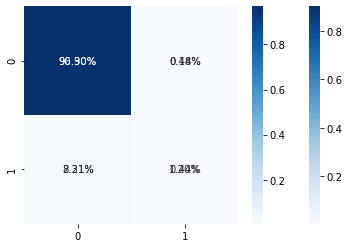

In [51]:
y_Balancedpredict=winner_BalancedRandomForestClassifier.predict(X_test)
my_Balancedconfusion=confusion_matrix(y_test,y_Balancedpredict)
sns.heatmap(my_Balancedconfusion/np.sum(my_Balancedconfusion), annot=True, 
            fmt='.2%', cmap='Blues')

mona_y_Balancedpredict=winner_BalancedRandomForestClassifier.predict(mona_X)
mona_my_Balancedconfusion=confusion_matrix(mona_y,mona_y_Balancedpredict)
sns.heatmap(mona_my_Balancedconfusion/np.sum(mona_my_Balancedconfusion), annot=True, 
            fmt='.2%', cmap='Blues')

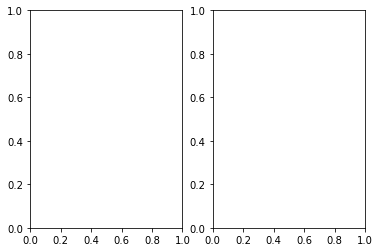

In [52]:
fig,ax=plt.subplots(1,2)

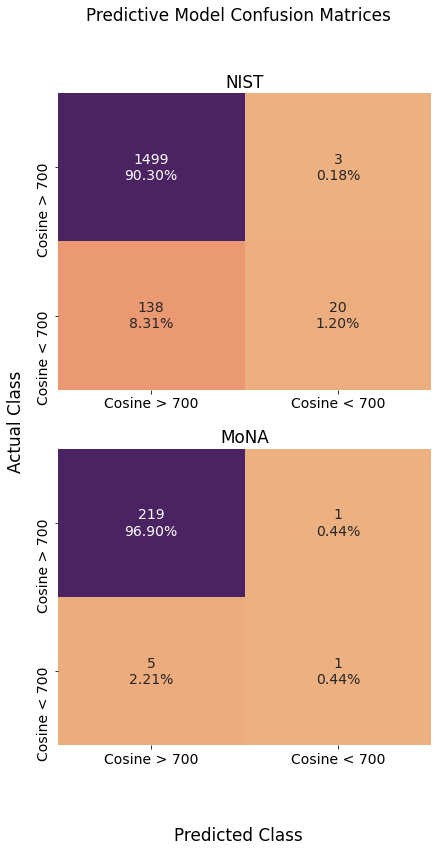

In [60]:
plt.rcParams['font.size']=14
plt.rcParams['font.family']='Arial'
fig,ax=plt.subplots(2,1,figsize=(6.69292, 12),facecolor='w')
ax[0].set_title('NIST')
make_confusion_matrix(
    my_Balancedconfusion,
    ax[0],
    cbar=False,
    categories=['Cosine > 700', 'Cosine < 700']
)
ax[1].set_title('MoNA')
make_confusion_matrix(
    mona_my_Balancedconfusion,
    ax[1],
    cbar=False,
    categories=['Cosine > 700', 'Cosine < 700']
)
fig.suptitle('Predictive Model Confusion Matrices')
fig.supylabel('Actual Class')
fig.supxlabel('Predicted Class')

plt.savefig('../../../results/final_figures/submitted_to_manuscript/confusion_matrices.png',
           facecolor=fig.get_facecolor())
plt.savefig('../../../results/final_figures/submitted_to_manuscript/confusion_matrices.eps',
           facecolor=fig.get_facecolor())

In [59]:
def make_confusion_matrix(cf,
                          temp_ax,
                          group_names=None,
                          categories='auto',
                          count=True,
                          percent=True,
                          cbar=True,
                          xyticks=True,
                          xyplotlabels=True,
                          sum_stats=True,
                          figsize=None,
                          cmap='flare',
                          title=None,
                         ):
    '''
    This function will make a pretty plot of an sklearn Confusion Matrix cm using a Seaborn heatmap visualization.
    Arguments
    ---------
    cf:            confusion matrix to be passed in
    group_names:   List of strings that represent the labels row by row to be shown in each square.
    categories:    List of strings containing the categories to be displayed on the x,y axis. Default is 'auto'
    count:         If True, show the raw number in the confusion matrix. Default is True.
    normalize:     If True, show the proportions for each category. Default is True.
    cbar:          If True, show the color bar. The cbar values are based off the values in the confusion matrix.
                   Default is True.
    xyticks:       If True, show x and y ticks. Default is True.
    xyplotlabels:  If True, show 'True Label' and 'Predicted Label' on the figure. Default is True.
    sum_stats:     If True, display summary statistics below the figure. Default is True.
    figsize:       Tuple representing the figure size. Default will be the matplotlib rcParams value.
    cmap:          Colormap of the values displayed from matplotlib.pyplot.cm. Default is 'Blues'
                   See http://matplotlib.org/examples/color/colormaps_reference.html
                   
    title:         Title for the heatmap. Default is None.
    '''


    # CODE TO GENERATE TEXT INSIDE EACH SQUARE
    blanks = ['' for i in range(cf.size)]

    if group_names and len(group_names)==cf.size:
        group_labels = ["{}\n".format(value) for value in group_names]
    else:
        group_labels = blanks

    if count:
        group_counts = ["{0:0.0f}\n".format(value) for value in cf.flatten()]
    else:
        group_counts = blanks

    if percent:
        group_percentages = ["{0:.2%}".format(value) for value in cf.flatten()/np.sum(cf)]
    else:
        group_percentages = blanks

    box_labels = [f"{v1}{v2}{v3}".strip() for v1, v2, v3 in zip(group_labels,group_counts,group_percentages)]
    box_labels = np.asarray(box_labels).reshape(cf.shape[0],cf.shape[1])


    # CODE TO GENERATE SUMMARY STATISTICS & TEXT FOR SUMMARY STATS
    if sum_stats:
        #Accuracy is sum of diagonal divided by total observations
        accuracy  = np.trace(cf) / float(np.sum(cf))

        #if it is a binary confusion matrix, show some more stats
        if len(cf)==2:
            #Metrics for Binary Confusion Matrices
            precision = cf[1,1] / sum(cf[:,1])
            recall    = cf[1,1] / sum(cf[1,:])
            f1_score  = 2*precision*recall / (precision + recall)
            stats_text = "\n\nAccuracy={:0.3f}\nPrecision={:0.3f}\nRecall={:0.3f}\nF1 Score={:0.3f}".format(
                accuracy,precision,recall,f1_score)
        else:
            stats_text = "\n\nAccuracy={:0.3f}".format(accuracy)
    else:
        stats_text = ""


    # SET FIGURE PARAMETERS ACCORDING TO OTHER ARGUMENTS
    if figsize==None:
        #Get default figure size if not set
        figsize = plt.rcParams.get('figure.figsize')

    if xyticks==False:
        #Do not show categories if xyticks is False
        categories=False


    # MAKE THE HEATMAP VISUALIZATION
    #plt.figure(figsize=figsize)
    sns.heatmap(cf,
                annot=box_labels,
                fmt="",
                cmap=cmap,
                cbar=cbar,
                xticklabels=categories,
                yticklabels=categories,
                ax=temp_ax
               )

#     if xyplotlabels:
#         plt.ylabel('True label')
#         plt.xlabel('Predicted label' + stats_text)
#     else:
#         plt.xlabel(stats_text)
    
#     if title:
#         plt.title(title)